In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
from rich import print
import numpy as np
import spacy

from utils import process_tweet, build_freqs


## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial. 

You can download the dataset in your workspace (or in your local computer) by doing:

In [3]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')
nltk.download('stopwords')


[nltk_data] Downloading package twitter_samples to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))


Number of positive tweets:  5000

Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>

The type of a tweet entry is:  <class 'str'>

We can see that the data is stored in a list and as you might expect, individual tweets are stored as strings.

You can make a more visually appealing report by using Matplotlib's [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) library. Let us see how to create a [pie chart](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) to show the same information as above. This simple snippet will serve you in future visualizations of this kind of data.

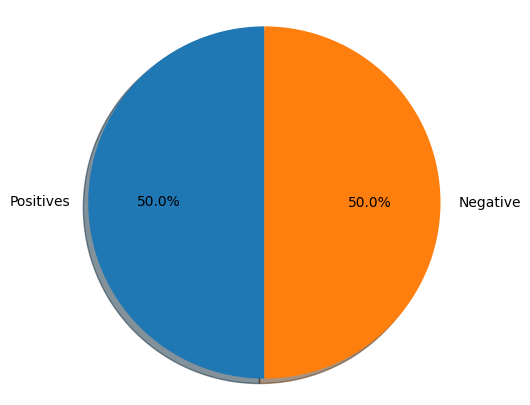

In [5]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()


## Looking at raw texts

Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two. (Warning: This is taken from a public dataset of real tweets and a very small portion has explicit content.)

In [6]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])


[92mI'am ELF, hbu? :)

[91mhis smile is so beautiful :( https://t.co/OiAHorQJOb

## Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

In [7]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
https://t.co/3tfYom0N1i

In [8]:
# download the stopwords from NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings


### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [10]:
print('\033[92m' + tweet)
print('\033[94m')


[92mMy beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
https://t.co/3tfYom0N1i

[94m

In [11]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off…

### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [12]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)


# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


[92mMy beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off…

[94m

Tokenized string:

[
    'my',
    'beautiful',
    'sunflowers',
    'on',
    'a',
    'sunny',
    'friday',
    'morning',
    'off',
    ':)',
    'sunflowers',
    'favourites',
    'happy',
    'friday',
    'off',
    '…'
]

### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [13]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)


Stop words

[
    'i',
    'me',
    'my',
    'myself',
    'we',
    'our',
    'ours',
    'ourselves',
    'you',
    "you're",
    "you've",
    "you'll",
    "you'd",
    'your',
    'yours',
    'yourself',
    'yourselves',
    'he',
    'him',
    'his',
    'himself',
    'she',
    "she's",
    'her',
    'hers',
    'herself',
    'it',
    "it's",
    'its',
    'itself',
    'they',
    'them',
    'their',
    'theirs',
    'themselves',
    'what',
    'which',
    'who',
    'whom',
    'this',
    'that',
    "that'll",
    'these',
    'those',
    'am',
    'is',
    'are',
    'was',
    'were',
    'be',
    'been',
    'being',
    'have',
    'has',
    'had',
    'having',
    'do',
    'does',
    'did',
    'doing',
    'a',
    'an',
    'the',
    'and',
    'but',
    'if',
    'or',
    'because',
    'as',
    'until',
    'while',
    'of',
    'at',
    'by',
    'for',
    'with',
    'about',
    'against',
    'between',
    'into',
    'through',
    'during',
    'before',
    'after',
    'above',
    'below',
    'to',
    'from',
    'up',
    'down',
    'in',
    'out',
    'on',
    'off',
    'over',
    'under',
    'again',
    'further',
    'then',
    'once',
    'here',
    'there',
    'when',
    'where',
    'why',
    'how',
    'all',
    'any',
    'both',
    'each',
    'few',
    'more',
    'most',
    'other',
    'some',
    'such',
    'no',
    'nor',
    'not',
    'only',
    'own',
    'same',
    'so',
    'than',
    'too',
    'very',
    's',
    't',
    'can',
    'will',
    'just',
    'don',
    "don't",
    'should',
    "should've",
    'now',
    'd',
    'll',
    'm',
    'o',
    're',
    've',
    'y',
    'ain',
    'aren',
    "aren't",
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'isn',
    "isn't",
    'ma',
    'mightn',
    "mightn't",
    'mustn',
    "mustn't",
    'needn',
    "needn't",
    'shan',
    "shan't",
    'shouldn',
    "shouldn't",
    'wasn',
    "wasn't",
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't"
]

Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

We can see that the stop words list above contains some words that could be important in some contexts. 
These could be words like _i, not, between, because, won, against_. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

In [14]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)


[92m

[
    'my',
    'beautiful',
    'sunflowers',
    'on',
    'a',
    'sunny',
    'friday',
    'morning',
    'off',
    ':)',
    'sunflowers',
    'favourites',
    'happy',
    'friday',
    'off',
    '…'
]

[94m

removed stop words and punctuation:

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [15]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)


[92m

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

[94m

stemmed words:

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']

## process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words. We will not ask you to replicate these however. In the week's assignment, you will use the function `process_tweet(tweet)` available in _utils.py_. We encourage you to open the file and you'll see that this function's implementation is very similar to the steps above.

To obtain the same result as in the previous code cells, you will only need to call the function `process_tweet()`. Let's do that in the next cell.

In [16]:
# import sys
# sys.path.append('../')
# from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result


[92m

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
https://t.co/3tfYom0N1i

[94m

preprocessed tweet:

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']

# Pre-Process using Spacy

In [17]:
import spacy


In [ ]:
%%bash

# download the statistical model for tokenization
python -m spacy download en_core_web_sm


In [18]:
# load the downloaded model
nlp = spacy.load('en_core_web_sm')

# lets grab the original text from earlier in the section
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
https://t.co/3tfYom0N1i

In [19]:
doc = nlp(tweet)
print(doc)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
https://t.co/3tfYom0N1i

In [20]:
# print the token. Each element in the Doc container is a token object
print([t.text for t in doc])


[
    'My',
    'beautiful',
    'sunflowers',
    'on',
    'a',
    'sunny',
    'Friday',
    'morning',
    'off',
    ':)',
    '#',
    'sunflowers',
    '#',
    'favourites',
    '#',
    'happy',
    '#',
    'Friday',
    'off',
    '…',
    'https://t.co/3tfYom0N1i'
]

In [21]:
# We can view an individual token by indexing into the Doc object.
print(doc[0])

# A Doc object is a container of other objects, namely Token and Span objects.
print(type(doc[0]))

# Slicing a Doc object returns a Span object.
print(doc[0:3])
print(type(doc[0:3]))


My

<class 'spacy.tokens.token.Token'>

My beautiful sunflowers

<class 'spacy.tokens.span.Span'>

In [22]:
# get the token index
print([(t.text, t.i) for t in doc])


[
    ('My', 0),
    ('beautiful', 1),
    ('sunflowers', 2),
    ('on', 3),
    ('a', 4),
    ('sunny', 5),
    ('Friday', 6),
    ('morning', 7),
    ('off', 8),
    (':)', 9),
    ('#', 10),
    ('sunflowers', 11),
    ('#', 12),
    ('favourites', 13),
    ('#', 14),
    ('happy', 15),
    ('#', 16),
    ('Friday', 17),
    ('off', 18),
    ('…', 19),
    ('https://t.co/3tfYom0N1i', 20)
]

In [23]:
# get the original input like so
print(doc.text)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
https://t.co/3tfYom0N1i

In [24]:
print([t.lower_ for t in doc])


[
    'my',
    'beautiful',
    'sunflowers',
    'on',
    'a',
    'sunny',
    'friday',
    'morning',
    'off',
    ':)',
    '#',
    'sunflowers',
    '#',
    'favourites',
    '#',
    'happy',
    '#',
    'friday',
    'off',
    '…',
    'https://t.co/3tfyom0n1i'
]

In [26]:
# spaCy comes with a default stop word list.
# To view your document with stop words removed, you can use the *is_stop* attribute.
# print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))


326

In [27]:
tweet_no_stop_word = [t for t in doc if not t.is_stop]
print(tweet_no_stop_word)


[
    beautiful,
    sunflowers,
    sunny,
    Friday,
    morning,
    :),
    #,
    sunflowers,
    #,
    favourites,
    #,
    happy,
    #,
    Friday,
    …,
    https://t.co/3tfYom0N1i
]

In [28]:
print([(t.text, t.lemma_) for t in doc])


[
    ('My', 'my'),
    ('beautiful', 'beautiful'),
    ('sunflowers', 'sunflower'),
    ('on', 'on'),
    ('a', 'a'),
    ('sunny', 'sunny'),
    ('Friday', 'Friday'),
    ('morning', 'morning'),
    ('off', 'off'),
    (':)', ':)'),
    ('#', '#'),
    ('sunflowers', 'sunflower'),
    ('#', '#'),
    ('favourites', 'favourite'),
    ('#', '#'),
    ('happy', 'happy'),
    ('#', '#'),
    ('Friday', 'Friday'),
    ('off', 'off'),
    ('…', '…'),
    ('https://t.co/3tfYom0N1i', 'https://t.co/3tfyom0n1i')
]

In [30]:
# use nltk to remove punctuations
tweet_no_stop_word_no_punc = [word.text for word in tweet_no_stop_word if word.text not in string.punctuation]
print(tweet_no_stop_word_no_punc)


[
    'beautiful',
    'sunflowers',
    'sunny',
    'Friday',
    'morning',
    ':)',
    'sunflowers',
    'favourites',
    'happy',
    'Friday',
    '…',
    'https://t.co/3tfYom0N1i'
]

In [31]:
# Perform stemming using a different nltk stem model
from nltk.stem.snowball import SnowballStemmer


In [34]:
stemmer = SnowballStemmer('english')

tweet_no_stop_word_no_punc_stem = [stemmer.stem(word) for word in tweet_no_stop_word_no_punc]
print(tweet_no_stop_word_no_punc_stem)


[
    'beauti',
    'sunflow',
    'sunni',
    'friday',
    'morn',
    ':)',
    'sunflow',
    'favourit',
    'happi',
    'friday',
    '…',
    'https://t.co/3tfyom0n1i'
]

In [35]:
# Remove url
tweet_no_stop_word_no_punc_stem = [word for word in tweet_no_stop_word_no_punc_stem if not word.startswith('http')]
print(tweet_no_stop_word_no_punc_stem)


['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']

# Building and Visualizing word frequencies


In this lab, we will focus on the `build_freqs()` helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset in the week's programming assignment. Let's see how this function is implemented under the hood in this notebook.

## Load the NLTK sample dataset

As in the previous lab, we will be using the [Twitter dataset from NLTK](http://www.nltk.org/howto/twitter.html#Using-a-Tweet-Corpus).

In [39]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))


Number of tweets:  10000

In [45]:
#create an array of label
ones = np.ones((len(all_positive_tweets), 1))
zeros = np.zeros((len(all_negative_tweets), 1))
labels = np.vstack((ones, zeros))


In [44]:
tweets


['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [46]:
labels_list = np.squeeze(labels)
labels_list


array([1., 1., 1., ..., 0., 0., 0.])

In [51]:
def buil_local_freqs(ys, tweets):
    freqs = {}
    labels_list = np.squeeze(ys).tolist()
    for label, tweet in zip(labels_list, tweets):
        for word in process_tweet(tweet):
            pair = (word, label)
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs


In [52]:
freqs = buil_local_freqs(labels, tweets)
freqs


{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3691,
 ('hey', 1.0): 77,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 99,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 643,
 ('listen', 1.0): 17,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 131,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 401,


In [63]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti','❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data


[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. :) has 3691 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral.

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


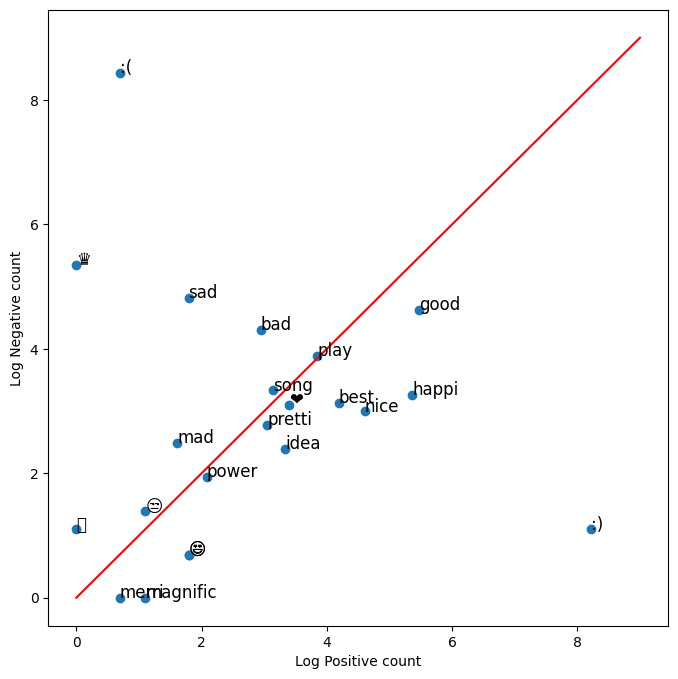

In [64]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()
